<a href="https://colab.research.google.com/github/muhammedbalogun/Global_AI_TeamExplorer/blob/main/medical_cost_analysis_TeamExplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Analysis

## Introduction

## Data Wrangling

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# import warning and ignore future warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Gathering Data

In [2]:
# load dataset
df = pd.read_csv("insurance.csv")

### Assessing Data

In [3]:
# preliminary assessment function

def assess_data(df):
    
    # check header
    print("The First Five Observations in the DataFrame \n")
    display(df.head())
    print('\n')

    # check tail
    print("The Last Five Observations in the DataFrame \n")
    display(df.tail())
    print('\n')
    
    # check shape of df
    print("The Shape of the DataFrame")
    print(df.shape)
    print('\n')
    
    # check info of df
    print("Basic Information of the DataFrame \n")
    display(df.info())
    print('\n')
    
    # check number of unique values in df
    print("Number of Unique Values in the DataFrame \n")
    print(df.nunique())
    print('\n')
    
    # check number of missing values in df
    print("Number of Missing Values in the DataFrame \n")
    print(df.isnull().sum())
    print('\n')
    
    # check number duplicates in df
    print("Number of Duplicates in DataFrame")
    print("Number of duplicates: ", df.duplicated().sum())
    print('\n')

    # check summary statistics of numeric data in df
    print("Summary Statistics")
    print(df.describe())

In [4]:
# explore data set
assess_data(df)

The First Five Observations in the DataFrame 



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




The Last Five Observations in the DataFrame 



,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603




The Shape of the DataFrame
(1338, 7)


Basic Information of the DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None



Number of Unique Values in the DataFrame 

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


Number of Missing Values in the DataFrame 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Number of Duplicates in DataFrame
Number of duplicates:  1


Summary Statistics
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Summary of Assessment

- There are 1338 number of observations and 7 columns in the dataset
- There are six features (age, sex, bmi, children, smoker and region) and one target (charges) variable in the dataset
- No missing values in the dataset
- There is one duplicate row in the dataset
- sex, smoker and region contains categorical variables
- The age range of correspondence in the dataset is from 18 - 64 years


### Cleaning Data

In [5]:
# copy data for cleaning
df_clean = df.copy()

In [6]:
# check duplicate row
df_clean[df_clean.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# drop duplicates
df_clean.drop_duplicates(inplace=True)

# confirm drop
df_clean[df_clean.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [8]:
# change data type of categorical variables from object to category
cat_columns = ['sex', 'smoker', 'region']

for col in cat_columns:
  df_clean[col] = df_clean[col].astype('category')

# confirm changes
df_clean.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## Exploratory Data Analysis

### What is the distribution of "bmi" (Body Mass Index)?

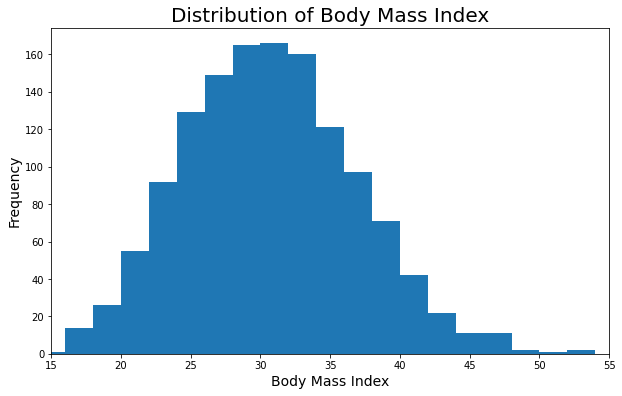

In [31]:
# set binsize
binsize = 2
bins = np.arange(0, df_clean['bmi'].max()+binsize, binsize)

# specify fig size
plt.figure(figsize=(10, 6))

# plot histogram
plt.hist(data=df_clean, x='bmi', bins=bins)
plt.xlim([15, 55])
plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Body Mass Index', fontsize=20);

### Is there outliers in "bmi"?

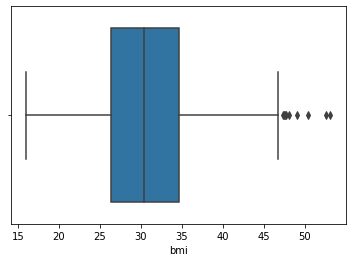

In [35]:
# check for outliers in bmi
sns.boxplot(data=df_clean, x='bmi');

The bmi value from the dataset, ranges from 15.96 to 53.13 with very few correspodent in the dataset having a bmi greater than 46. There tends to be some outlier in the dataset. To understand what outlier means in this domain, we search for the range of bmi value for adults between the age of 18 and 64.

> According to the National Health Service in UK, the ideal BMI range for most adults is 18.5 to 24.9. 
They gave the following classification of BMI;
- below 18.5 – underweight range
- between 18.5 and 24.9 – healthy weight range
- between 25 and 29.9 – overweight range
- between 30 and 39.9 – obese range

> (source: https://shorturl.at/mrTX2)

> Also for pregnant women, bmi could range from 37 - 54 (source: https://shorturl.at/AGJQU) 

In [34]:
df_clean[df_clean['bmi'] > 45]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
582,39,male,45.43,2,no,southeast,6356.27070


### What is the relationship between "smoker" and "region"?

### What is the relationship between "smoker" and "charges"?

### What is the relationship between "bmi" and "sex"?

### What is the relationship between "bmi" and "children"?

### What is the relationship between "age" and "bmi"?

### Which "region" have the highest number of "children"?

## Conclusions